In [1]:
from WBT.whitebox_tools import WhiteboxTools
import rasterio
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

wbt = WhiteboxTools()

In [22]:
# Working directory looks like this:
#
#├───surfaces
#│   ├───clear
#│   │       hemicylinder_clear.tif
#│   │       hemisphere_clear.tif
#│   │       paraboloid_clear.tif
#│   │
#│   ├───filtered
#│   │   ├───AdaptiveFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   ├───BilateralFilter
#│   │   ├───ConservativeSmoothingFilter
#│   │   ├───EdgePreservingMeanFilter
#│   │   ├───FeaturePreservingSmoothing
#│   │   ├───KNearestMeanFilter
#│   │   ├───LeeSigmaFilter
#│   │   ├───MajorityFilter
#│   │   ├───MeanFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   ├───MedianFilter
#│   │   │       hemicylinder_filtered.tif
#│   │   │       hemisphere_filtered.tif
#│   │   │       paraboloid_filtered.tif
#│   │   │
#│   │   └───OlympicFilter
#│   └───noisy
#│           hemicylinder_noisy.tif
#│           hemisphere_noisy.tif
#│           paraboloid_noisy.tif

In [2]:
os.chdir(r'C:\\Users\\sasha\\abstract_surfaces\\')

In [3]:
entries = os.listdir('./surfaces/')
entries

['clear', 'filtered', 'noisy']

In [4]:
clear_dems = os.listdir('./surfaces/' + entries[0])
noisy_dems = os.listdir('./surfaces/' + entries[2])
filtered_dems = os.listdir('./surfaces/' + entries[1])

print(f'Clear dems: {clear_dems}', f'Noisy dems: {noisy_dems}', f'Filtered dems: {filtered_dems}', sep='\n')

Clear dems: ['hemicylinder_clear.tif', 'hemisphere_clear.tif', 'paraboloid_clear.tif']
Noisy dems: ['hemicylinder_noisy.tif', 'hemisphere_noisy.tif', 'paraboloid_noisy.tif']
Filtered dems: []


In [5]:
arr_clear_dems = []
for clear_dem in clear_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\clear\\' + clear_dem
    #print(tmp_path)
    
    with rasterio.open(tmp_path, 'r') as ds:
        arr_in = ds.read()
    #arr_clear_dems[clear_dem] = arr_in[0]
    arr_clear_dems.append(arr_in[0])
    #plt.imshow(arr_noisy_dems[-1], cmap='binary')
    #plt.show()
    print(f'Appended {clear_dem}')

Appended hemicylinder_clear.tif
Appended hemisphere_clear.tif
Appended paraboloid_clear.tif


In [6]:
arr_noisy_dems = []
for noisy_dem in noisy_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    #print(tmp_path)
    
    with rasterio.open(tmp_path, 'r') as ds:
        arr_in = ds.read()
    #arr_noisy_dems[noisy_dem] = arr_in[0]
    arr_noisy_dems.append(arr_in[0])
    #plt.imshow(arr_noisy_dems[-1], cmap='binary')
    #plt.show()
    print(f'Appended {noisy_dem}')

Appended hemicylinder_noisy.tif
Appended hemisphere_noisy.tif
Appended paraboloid_noisy.tif


In [105]:
filter_list = (
    r'MeanFilter\\',
    r'MedianFilter\\',
    r'AdaptiveFilter\\',
    r'FeaturePreservingSmoothing\\'
)

In [106]:
arr_filtered_dems = []
for noisy_dem in noisy_dems:
    
    tmp_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    filter_dir = r'C:\Users\sasha\abstract_surfaces\surfaces\filtered\\'
    
    wbt.verbose = True
    
    #MeanFilter
    output_path = filter_dir + filter_list[0] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.mean_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5
    )
    
    #MedianFilter
    output_path = filter_dir + filter_list[1] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.median_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5,
        sig_digits=2
    )
    
    #AdaptiveFilter
    output_path = filter_dir + filter_list[2] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.adaptive_filter(
        i = tmp_path, 
        output = output_path, 
        filterx=5, 
        filtery=5, 
        threshold=0.6
    )
    
    #FeaturePreservingSmoothingFilter
    output_path = filter_dir + filter_list[3] + noisy_dem[:-10] + '_filtered.tif'
    
    wbt.feature_preserving_smoothing(
        dem = tmp_path, 
        output = output_path, 
        filter = 5, 
        norm_diff = 1.0, 
        num_iter = 3, 
        max_diff = 0.5, 
        zfactor = None
    )

.\whitebox_tools.exe --run="MeanFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\MeanFilter\\hemicylinder_filtered.tif' --filterx=5 --filtery=5 -v --compress_rasters=False

****************************
* Welcome to MeanFilter    *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Creating integral images: 0%
Creating integral images: 1%
Creating integral images: 2%
Creating integral images: 3%
Creating integral images: 4%
Creating integral images: 5%
Creating integral images: 6%
Creating integral images: 7%
Creating integral images: 8%
Creating integral images: 10%
Creating integral images: 11%
Creating integral images: 12%
Creating integral images: 13%
Creating integral images: 14%
Creating integral images: 15%
Creating integral images: 16%
Creating integral images: 17%
Creating integral images: 19%
Creating integral images: 20%
Cr

Performing analysis: 76%
Performing analysis: 77%
Performing analysis: 78%
Performing analysis: 79%
Performing analysis: 80%
Performing analysis: 82%
Performing analysis: 83%
Performing analysis: 84%
Performing analysis: 85%
Performing analysis: 86%
Performing analysis: 87%
Performing analysis: 88%
Performing analysis: 89%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.2s
.\whitebox_tools.exe --run="AdaptiveFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\AdaptiveFilter\\hemicylinder_filtered.tif' --filterx=5 --filtery=5 --threshold=0.6 -v --compress_rasters=False

*****************************
* Welcome to AdaptiveFilter *
* Powered by Whiteb

Calculating normal vectors: 76%
Calculating normal vectors: 77%
Calculating normal vectors: 78%
Calculating normal vectors: 79%
Calculating normal vectors: 80%
Calculating normal vectors: 82%
Calculating normal vectors: 83%
Calculating normal vectors: 84%
Calculating normal vectors: 85%
Calculating normal vectors: 86%
Calculating normal vectors: 87%
Calculating normal vectors: 88%
Calculating normal vectors: 89%
Calculating normal vectors: 91%
Calculating normal vectors: 92%
Calculating normal vectors: 93%
Calculating normal vectors: 94%
Calculating normal vectors: 95%
Calculating normal vectors: 96%
Calculating normal vectors: 97%
Calculating normal vectors: 98%
Calculating normal vectors: 100%
Calculating normal vectors: 0.1s
Smoothing normal vectors: 0%
Smoothing normal vectors: 1%
Smoothing normal vectors: 2%
Smoothing normal vectors: 3%
Smoothing normal vectors: 4%
Smoothing normal vectors: 5%
Smoothing normal vectors: 6%
Smoothing normal vectors: 7%
Smoothing normal vectors: 8%
S

Updating DEM elevations (Loop 2 of 3): 21%
Updating DEM elevations (Loop 2 of 3): 22%
Updating DEM elevations (Loop 2 of 3): 23%
Updating DEM elevations (Loop 2 of 3): 24%
Updating DEM elevations (Loop 2 of 3): 25%
Updating DEM elevations (Loop 2 of 3): 26%
Updating DEM elevations (Loop 2 of 3): 28%
Updating DEM elevations (Loop 2 of 3): 29%
Updating DEM elevations (Loop 2 of 3): 30%
Updating DEM elevations (Loop 2 of 3): 31%
Updating DEM elevations (Loop 2 of 3): 32%
Updating DEM elevations (Loop 2 of 3): 33%
Updating DEM elevations (Loop 2 of 3): 34%
Updating DEM elevations (Loop 2 of 3): 35%
Updating DEM elevations (Loop 2 of 3): 37%
Updating DEM elevations (Loop 2 of 3): 38%
Updating DEM elevations (Loop 2 of 3): 39%
Updating DEM elevations (Loop 2 of 3): 40%
Updating DEM elevations (Loop 2 of 3): 41%
Updating DEM elevations (Loop 2 of 3): 42%
Updating DEM elevations (Loop 2 of 3): 43%
Updating DEM elevations (Loop 2 of 3): 44%
Updating DEM elevations (Loop 2 of 3): 46%
Updating DE

Creating integral images: 26%
Creating integral images: 27%
Creating integral images: 28%
Creating integral images: 29%
Creating integral images: 30%
Creating integral images: 31%
Creating integral images: 32%
Creating integral images: 33%
Creating integral images: 34%
Creating integral images: 35%
Creating integral images: 36%
Creating integral images: 37%
Creating integral images: 38%
Creating integral images: 39%
Creating integral images: 40%
Creating integral images: 41%
Creating integral images: 42%
Creating integral images: 43%
Creating integral images: 44%
Creating integral images: 45%
Creating integral images: 46%
Creating integral images: 47%
Creating integral images: 48%
Creating integral images: 49%
Creating integral images: 50%
Creating integral images: 51%
Creating integral images: 52%
Creating integral images: 53%
Creating integral images: 54%
Creating integral images: 55%
Creating integral images: 56%
Creating integral images: 57%
Creating integral images: 58%
Creating i

Performing analysis: 89%
Performing analysis: 90%
Performing analysis: 91%
Performing analysis: 92%
Performing analysis: 93%
Performing analysis: 94%
Performing analysis: 95%
Performing analysis: 96%
Performing analysis: 97%
Performing analysis: 98%
Performing analysis: 99%
Performing analysis: 100%
Saving data...
Output file written
Elapsed Time (excluding I/O): 0.4s
.\whitebox_tools.exe --run="AdaptiveFilter" --input='C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemisphere_noisy.tif' --output='C:\Users\sasha\abstract_surfaces\surfaces\filtered\\AdaptiveFilter\\hemisphere_filtered.tif' --filterx=5 --filtery=5 --threshold=0.6 -v --compress_rasters=False

*****************************
* Welcome to AdaptiveFilter *
* Powered by WhiteboxTools  *
* www.whiteboxgeo.com       *
*****************************
Reading data...
Calculating integral images: 0%
Calculating integral images: 1%
Calculating integral images: 2%
Calculating integral images: 3%
Calculating integral images: 4%
Calcula

Calculating normal vectors: 63%
Calculating normal vectors: 64%
Calculating normal vectors: 65%
Calculating normal vectors: 66%
Calculating normal vectors: 67%
Calculating normal vectors: 68%
Calculating normal vectors: 69%
Calculating normal vectors: 70%
Calculating normal vectors: 71%
Calculating normal vectors: 72%
Calculating normal vectors: 73%
Calculating normal vectors: 74%
Calculating normal vectors: 75%
Calculating normal vectors: 76%
Calculating normal vectors: 77%
Calculating normal vectors: 78%
Calculating normal vectors: 79%
Calculating normal vectors: 80%
Calculating normal vectors: 81%
Calculating normal vectors: 82%
Calculating normal vectors: 83%
Calculating normal vectors: 84%
Calculating normal vectors: 85%
Calculating normal vectors: 86%
Calculating normal vectors: 87%
Calculating normal vectors: 88%
Calculating normal vectors: 89%
Calculating normal vectors: 90%
Calculating normal vectors: 91%
Calculating normal vectors: 92%
Calculating normal vectors: 93%
Calculat

Updating DEM elevations (Loop 1 of 3): 90%
Updating DEM elevations (Loop 1 of 3): 91%
Updating DEM elevations (Loop 1 of 3): 92%
Updating DEM elevations (Loop 1 of 3): 93%
Updating DEM elevations (Loop 1 of 3): 94%
Updating DEM elevations (Loop 1 of 3): 95%
Updating DEM elevations (Loop 1 of 3): 96%
Updating DEM elevations (Loop 1 of 3): 97%
Updating DEM elevations (Loop 1 of 3): 98%
Updating DEM elevations (Loop 1 of 3): 99%
Updating DEM elevations (Loop 1 of 3): 100%
Iteration 2 of 3...
Updating DEM elevations (Loop 2 of 3): 0%
Updating DEM elevations (Loop 2 of 3): 1%
Updating DEM elevations (Loop 2 of 3): 2%
Updating DEM elevations (Loop 2 of 3): 3%
Updating DEM elevations (Loop 2 of 3): 4%
Updating DEM elevations (Loop 2 of 3): 5%
Updating DEM elevations (Loop 2 of 3): 6%
Updating DEM elevations (Loop 2 of 3): 7%
Updating DEM elevations (Loop 2 of 3): 8%
Updating DEM elevations (Loop 2 of 3): 9%
Updating DEM elevations (Loop 2 of 3): 10%
Updating DEM elevations (Loop 2 of 3): 11%


Updating DEM elevations (Loop 3 of 3): 79%
Updating DEM elevations (Loop 3 of 3): 80%
Updating DEM elevations (Loop 3 of 3): 81%
Updating DEM elevations (Loop 3 of 3): 82%
Updating DEM elevations (Loop 3 of 3): 83%
Updating DEM elevations (Loop 3 of 3): 84%
Updating DEM elevations (Loop 3 of 3): 85%
Updating DEM elevations (Loop 3 of 3): 86%
Updating DEM elevations (Loop 3 of 3): 87%
Updating DEM elevations (Loop 3 of 3): 88%
Updating DEM elevations (Loop 3 of 3): 89%
Updating DEM elevations (Loop 3 of 3): 90%
Updating DEM elevations (Loop 3 of 3): 91%
Updating DEM elevations (Loop 3 of 3): 92%
Updating DEM elevations (Loop 3 of 3): 93%
Updating DEM elevations (Loop 3 of 3): 94%
Updating DEM elevations (Loop 3 of 3): 95%
Updating DEM elevations (Loop 3 of 3): 96%
Updating DEM elevations (Loop 3 of 3): 97%
Updating DEM elevations (Loop 3 of 3): 98%
Updating DEM elevations (Loop 3 of 3): 99%
Updating DEM elevations (Loop 3 of 3): 100%
Saving data...
Output file written
Elapsed Time (excl

Performing analysis: 0%
Performing analysis: 1%
Performing analysis: 2%
Performing analysis: 3%
Performing analysis: 4%
Performing analysis: 5%
Performing analysis: 6%
Performing analysis: 7%
Performing analysis: 8%
Performing analysis: 9%
Performing analysis: 10%
Performing analysis: 11%
Performing analysis: 12%
Performing analysis: 13%
Performing analysis: 14%
Performing analysis: 15%
Performing analysis: 16%
Performing analysis: 17%
Performing analysis: 18%
Performing analysis: 19%
Performing analysis: 20%
Performing analysis: 21%
Performing analysis: 22%
Performing analysis: 23%
Performing analysis: 24%
Performing analysis: 25%
Performing analysis: 26%
Performing analysis: 27%
Performing analysis: 28%
Performing analysis: 29%
Performing analysis: 30%
Performing analysis: 31%
Performing analysis: 32%
Performing analysis: 33%
Performing analysis: 34%
Performing analysis: 35%
Performing analysis: 36%
Performing analysis: 37%
Performing analysis: 38%
Performing analysis: 39%
Performing

* Welcome to FeaturePreservingSmoothing *
* Powered by WhiteboxTools              *
* www.whiteboxgeo.com                   *
*****************************************
Reading data...
Calculating normal vectors: 0%
Calculating normal vectors: 1%
Calculating normal vectors: 2%
Calculating normal vectors: 3%
Calculating normal vectors: 4%
Calculating normal vectors: 5%
Calculating normal vectors: 6%
Calculating normal vectors: 7%
Calculating normal vectors: 8%
Calculating normal vectors: 9%
Calculating normal vectors: 10%
Calculating normal vectors: 11%
Calculating normal vectors: 12%
Calculating normal vectors: 13%
Calculating normal vectors: 14%
Calculating normal vectors: 15%
Calculating normal vectors: 16%
Calculating normal vectors: 17%
Calculating normal vectors: 18%
Calculating normal vectors: 19%
Calculating normal vectors: 20%
Calculating normal vectors: 21%
Calculating normal vectors: 22%
Calculating normal vectors: 23%
Calculating normal vectors: 24%
Calculating normal vectors

Updating DEM elevations (Loop 1 of 3): 39%
Updating DEM elevations (Loop 1 of 3): 40%
Updating DEM elevations (Loop 1 of 3): 41%
Updating DEM elevations (Loop 1 of 3): 42%
Updating DEM elevations (Loop 1 of 3): 43%
Updating DEM elevations (Loop 1 of 3): 44%
Updating DEM elevations (Loop 1 of 3): 45%
Updating DEM elevations (Loop 1 of 3): 46%
Updating DEM elevations (Loop 1 of 3): 47%
Updating DEM elevations (Loop 1 of 3): 48%
Updating DEM elevations (Loop 1 of 3): 49%
Updating DEM elevations (Loop 1 of 3): 50%
Updating DEM elevations (Loop 1 of 3): 51%
Updating DEM elevations (Loop 1 of 3): 52%
Updating DEM elevations (Loop 1 of 3): 53%
Updating DEM elevations (Loop 1 of 3): 54%
Updating DEM elevations (Loop 1 of 3): 55%
Updating DEM elevations (Loop 1 of 3): 56%
Updating DEM elevations (Loop 1 of 3): 57%
Updating DEM elevations (Loop 1 of 3): 58%
Updating DEM elevations (Loop 1 of 3): 59%
Updating DEM elevations (Loop 1 of 3): 60%
Updating DEM elevations (Loop 1 of 3): 61%
Updating DE

Updating DEM elevations (Loop 3 of 3): 28%
Updating DEM elevations (Loop 3 of 3): 29%
Updating DEM elevations (Loop 3 of 3): 30%
Updating DEM elevations (Loop 3 of 3): 31%
Updating DEM elevations (Loop 3 of 3): 32%
Updating DEM elevations (Loop 3 of 3): 33%
Updating DEM elevations (Loop 3 of 3): 34%


In [23]:
#**Analysing results**

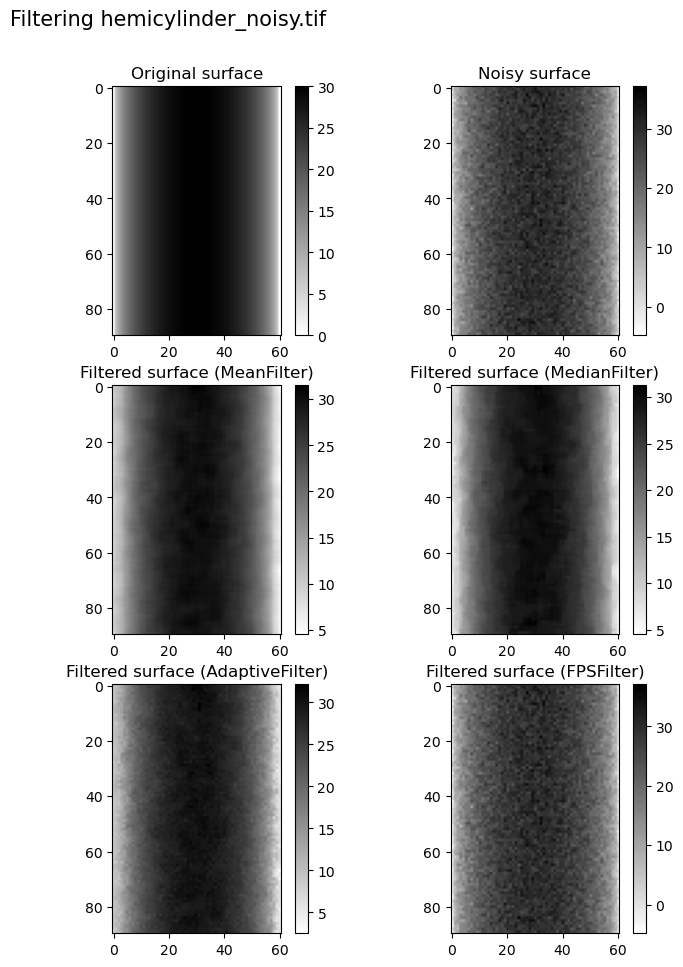

Min std has:  MedianFilter
Min mean has:  AdaptiveFilter


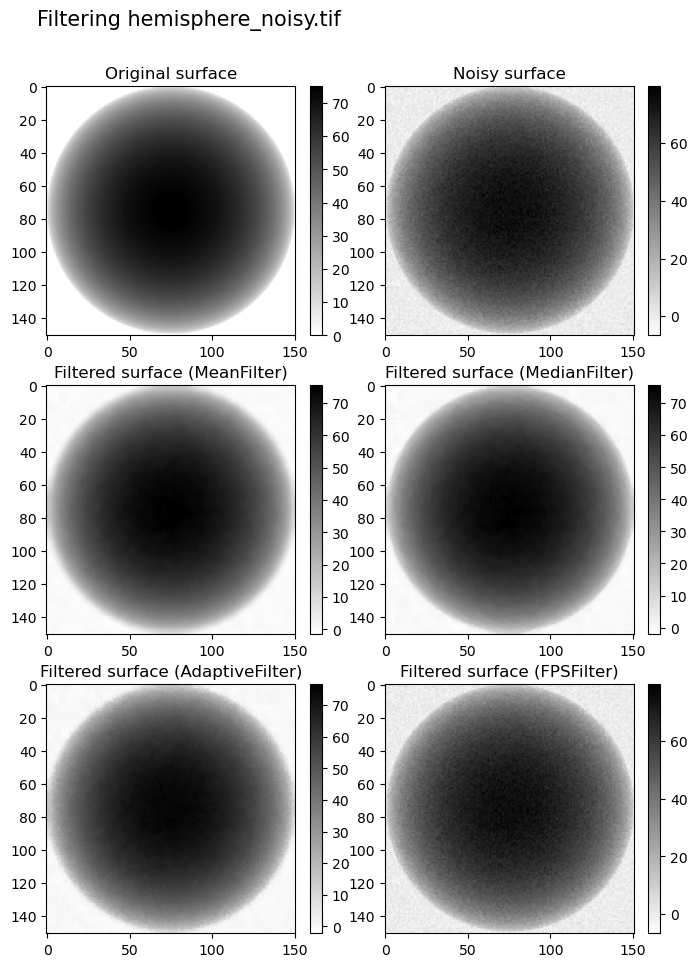

Min std has:  MedianFilter
Min mean has:  AdaptiveFilter


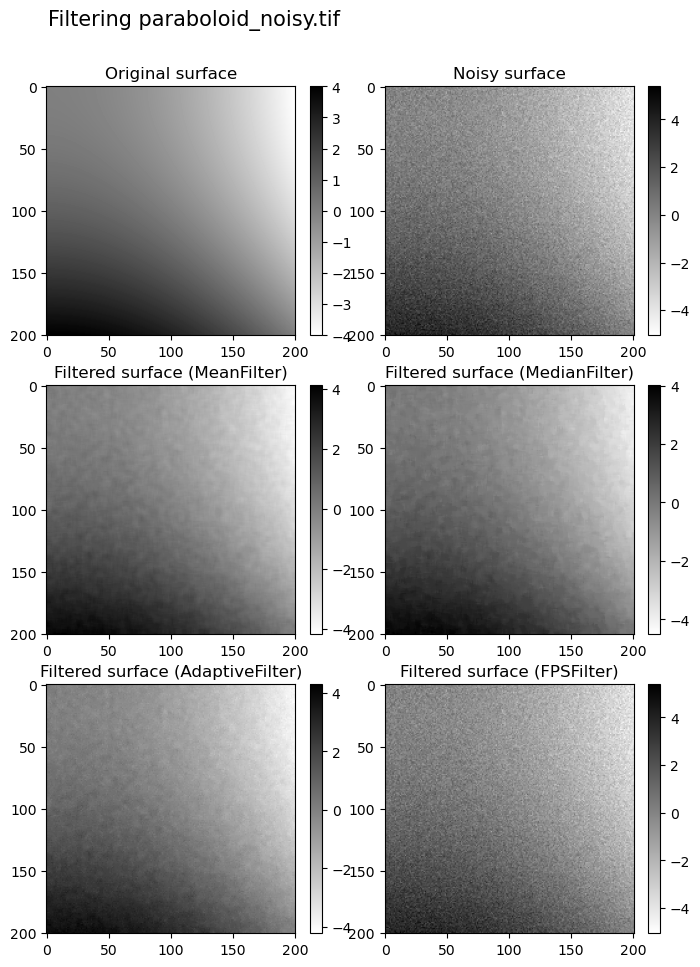

Min std has:  MeanFilter
Min mean has:  AdaptiveFilter


In [104]:
for noisy_dem in noisy_dems:
    
    dict_subtract = {}
    
    filter_dir = r'C:\Users\sasha\abstract_surfaces\surfaces\filtered\\'
               
    fig = plt.figure(figsize=(8,11))
    
    fig.suptitle(f'Filtering {noisy_dem}', y=.95, horizontalalignment='right', verticalalignment='top', fontsize = '15')
    
    rast_path = r'C:\Users\sasha\abstract_surfaces\surfaces\clear\\' + noisy_dem[:-10] + '_clear.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_clear = ds.read()
    
    ax1 = fig.add_subplot(321)
    ax1.set_title('Original surface')
    plt.imshow(data_clear[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    rast_path = r'C:\Users\sasha\abstract_surfaces\surfaces\noisy\\' + noisy_dem
    with rasterio.open(rast_path, 'r') as ds:
        data_noisy = ds.read()

    ax2 = fig.add_subplot(322)
    ax2.set_title('Noisy surface')
    plt.imshow(data_noisy[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #MeanFilter
    rast_path = filter_dir + filter_list[0] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_0 = ds.read()
        
    ax3 = fig.add_subplot(323)
    ax3.set_title('Filtered surface (MeanFilter)')
    plt.imshow(data_filt_0[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #MedianFilter
    rast_path = filter_dir + filter_list[1] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_1 = ds.read()
        
    ax4 = fig.add_subplot(324)
    ax4.set_title('Filtered surface (MedianFilter)')
    plt.imshow(data_filt_1[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #AdaptiveFilter
    rast_path = filter_dir + filter_list[2] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_2 = ds.read()
        
    ax5 = fig.add_subplot(325)
    ax5.set_title('Filtered surface (AdaptiveFilter)')
    plt.imshow(data_filt_2[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    
    #FeaturePreservingSmoothingFilter
    rast_path = filter_dir + filter_list[3] + noisy_dem[:-10] + '_filtered.tif'
    with rasterio.open(rast_path, 'r') as ds:
        data_filt_3 = ds.read()
        
    ax5 = fig.add_subplot(326)
    ax5.set_title('Filtered surface (FPSFilter)')
    plt.imshow(data_filt_3[0], cmap='binary')
    plt.colorbar(fraction=0.045)
    plt.show()
    
    dict_subtract['MeanFilter'] = np.std(np.subtract(data_clear, data_filt_0))
    dict_subtract['MedianFilter'] = np.std(np.subtract(data_clear, data_filt_1))
    dict_subtract['AdaptiveFilter'] = np.std(np.subtract(data_clear, data_filt_2))
    dict_subtract['FeaturePreservingSmoothingFilter'] = np.std(np.subtract(data_clear, data_filt_3))
    
    print('Min std has: ', min(dict_subtract, key=dict_subtract.get))
    
    dict_subtract['MeanFilter'] = np.mean(np.subtract(data_clear, data_filt_0))
    dict_subtract['MedianFilter'] = np.mean(np.subtract(data_clear, data_filt_1))
    dict_subtract['AdaptiveFilter'] = np.mean(np.subtract(data_clear, data_filt_2))
    dict_subtract['FeaturePreservingSmoothingFilter'] = np.mean(np.subtract(data_clear, data_filt_3))
    
    print('Min mean has: ', min(dict_subtract, key=dict_subtract.get))